# Introduction to Machine Learning - Exercise 9
Goal of the excercise is to learn how to use basic deep learning models in Scikit-learn and Keras.

![meme03](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_11_meme_03.jpg?raw=true)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.neural_network import MLPClassifier, MLPRegressor

# 📊 Deep learning introduction
* What types of neural networks (ANN) do you know?
    * For what types of data are these types the most useful? Why?

* What is the Multi-layer Perceptron (MLP)?
    * 🔎 What classic ML model is the closest to MLP by its function?
    * What is the difference between them?


## 📌 How does the ANN work in general?
* What does these terms mean?
    * Neuron
    * Input and weight
    * Activation function
        * Can ANN work without it?
    * Loss function
    * Optimizer

## Training and inference phase
* 🔎 How does the training phase work?
* And what about inference phase?
    * Which one is more computionaly intesive?

## 📒 Let's create an example of simple ANN using math formulas on blackboard

![img01](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_11_ann_01.png?raw=true)

# 🔎 What is the difference between MLP and Deep learning (DL)?

![img02](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_11_ann_02.png?raw=true)

# 🚀 Enough of theory, let's try it!

## Diabetes dataset
https://www.kaggle.com/datasets/saurabh00007/diabetescsv/data

### 🎯 Our goal is to build model able to classify if person has diabetes or not

In [2]:
df = pd.read_csv('https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/raw/refs/heads/main/datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Is each column numerical?

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Do we have any missing data?

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Is class distribution balanced?

In [5]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# ⚡ What features are more important than others?
* Why?

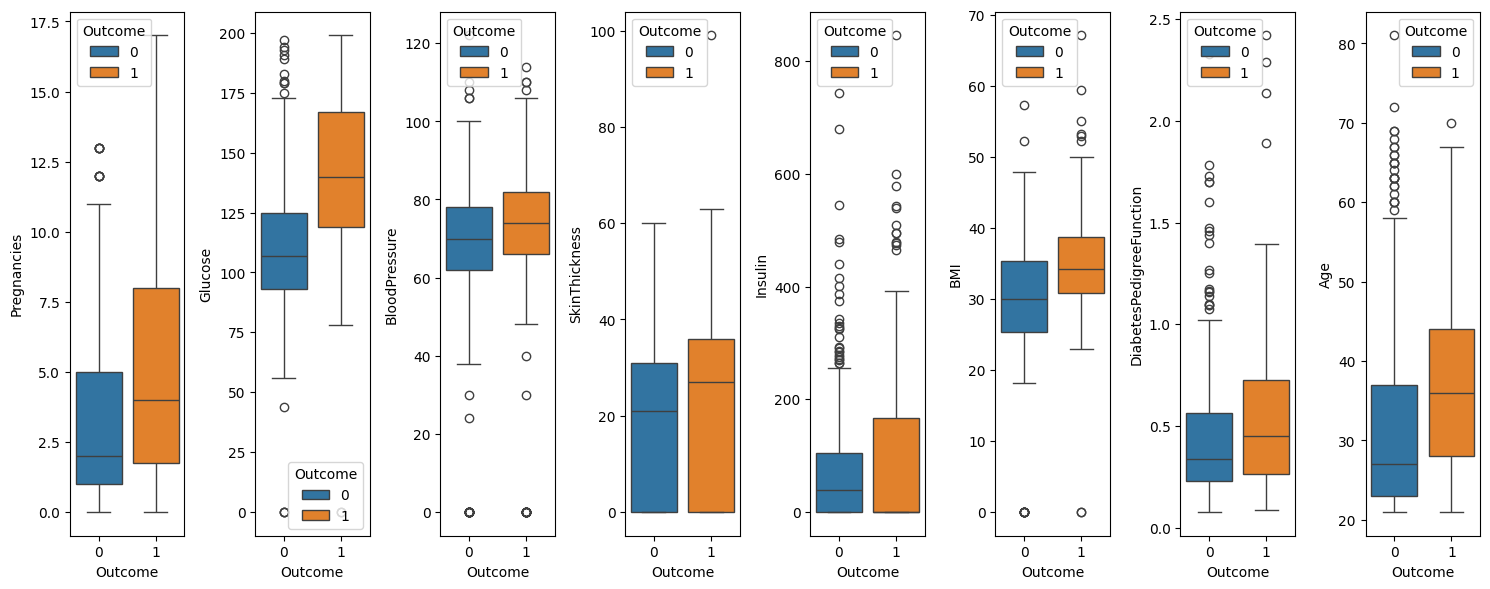

In [6]:
fig, axes = plt.subplots(1, df.shape[1]-1, figsize=(15, 6))

for i, col in enumerate(df.columns[:-1]):
    ax = axes.flatten()[i]
    sns.boxplot(data=df, y=col, x='Outcome', ax=ax, hue='Outcome')
        
fig.tight_layout()

## Now we can split the data into train/test set and proceed as usuall

In [7]:
X, y = df.drop('Outcome', axis=1), df['Outcome']

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((614, 8), (154, 8), (614,), (154,))

# 🚀 We will use the `MLPClassifier` model

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

* 💡 The sklearn ANN API is very basic, there are only a few parameters that are worth tuning
    * hidden_layer_sizes - the ANN hidden layers structure (tuple)
    * activation - activation function used in hidden layers
    * solver - optimizer
    * max_iter - number of epochs
    * batch_size - number of instances in one batch


## The pipeline is the same as with any other model
* We will define the model
* Fit it on training data
* Evaluate the performance

In [12]:
clf = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=300, batch_size=32, random_state=13)

In [13]:
clf.fit(X_train, y_train)

c:\VSB\FML_vyuka\EFREI\EFREI-Introduction-to-Machine-Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(8,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,32
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,13


In [14]:
y_pred = clf.predict(X_test)

In [15]:
f1_score(y_true=y_test, y_pred=y_pred)

0.5052631578947369

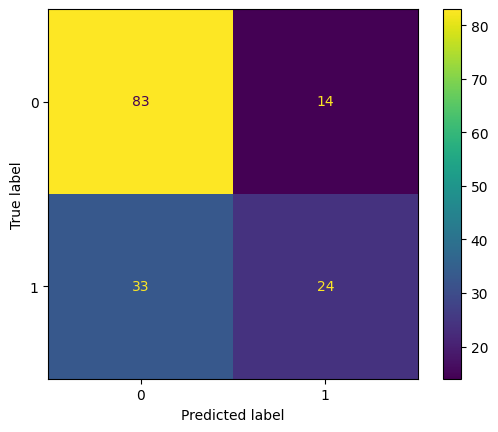

In [16]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()

# 💡 You can see that it does not matter if you are using ML or DL models
## The key principles are still the same 🙂

![meme01](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_11_meme_01.jpg?raw=true)

# 🔎 Can we improve the performace somehow?

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=300, batch_size=32, random_state=13)

In [18]:
clf.fit(X_train, y_train)

,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,32
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,13


In [19]:
y_pred = clf.predict(X_test)

In [20]:
f1_score(y_true=y_test, y_pred=y_pred)

0.6564885496183206

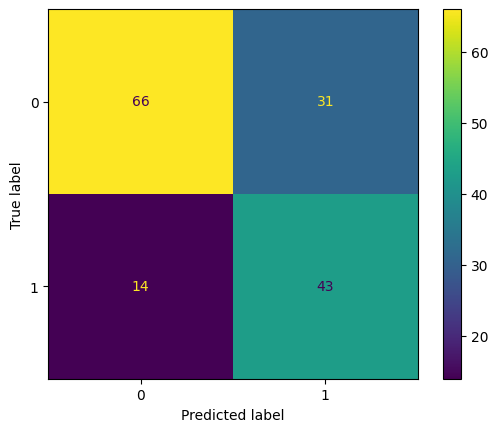

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()

## ⚡ We've come to a conclusion that ANN and Linear regression is pretty similar in principle earlier
* Do you remember what is a general issue for optimization algorithms?
    * 💡 It is about a differences in the input features
 
* The model can be made much simpler with a preprocessing employed

In [22]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [23]:
clf = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=100, batch_size=32, random_state=13)

In [24]:
clf.fit(X_train_std, y_train)

c:\VSB\FML_vyuka\EFREI\EFREI-Introduction-to-Machine-Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(8,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,32
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,100
,shuffle,True
,random_state,13


In [25]:
y_pred = clf.predict(X_test_std)

In [26]:
f1_score(y_true=y_test, y_pred=y_pred)

0.6262626262626263

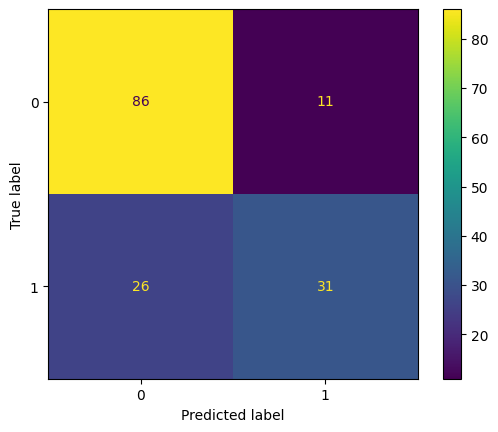

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()

# The Scikit-learn has not much more to offer unfortunately...

![meme02](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_11_meme_02.jpg?raw=true)

# 🚀 ... and that's the the reason why there are other frameworks focused on ANN
* Do you know any?
    * Have you worked with some of them already?
 
## ⚡ We will learn the basics of the Tensorflow/Keras using a minimal example on the MNIST dataset.

In [28]:
import tensorflow as tf
import tensorflow.keras as keras

tf.version.VERSION

'2.20.0'

# 💡 MNIST is the basic dataset with handwritten digits
* The data are in the form of 28x28 pixes with values 0-255
* The dataset consists of 60,000 training images and 10,000 testing images

In [29]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Train data shape: ', x_train.shape)
print('Test data shape:  ', x_test.shape)

Train data shape:  (60000, 28, 28)
Test data shape:   (10000, 28, 28)


# Let's look on the data
* 🔎 Why are the values in 0-255 range? 

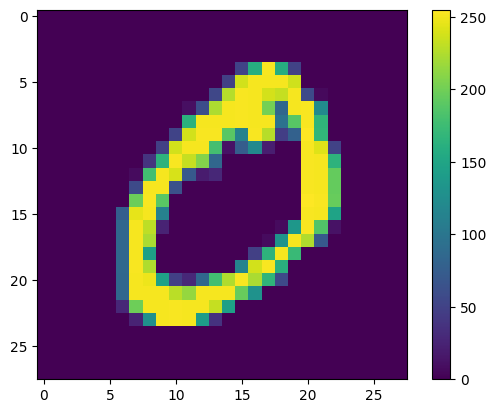

In [30]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

# We can see that the numbers are already centered
* You won't see this feature in the real world images often 🙂
* Some of the images are quite easy to classify but on the other hand there is a lot of noise in the data as well.

## 🔎 What number is on image below? Is it 1 or 7? 

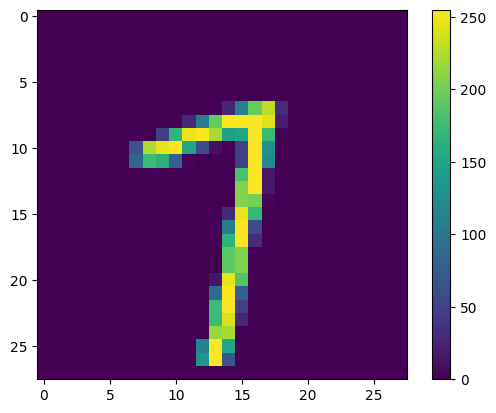

In [31]:
plt.figure()
plt.imshow(x_train[42])
plt.colorbar()
plt.grid(False)
plt.show()

# Lets normalize the values into the range \(0,1\) by dividing it 255.
* I guess that you already know why we do this preprocessing step 🙂

In [32]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# 📈 It's worth to make better visualization of the data to understand how complex they are
* You can see that "noisy" digits and different handwriting styles are common

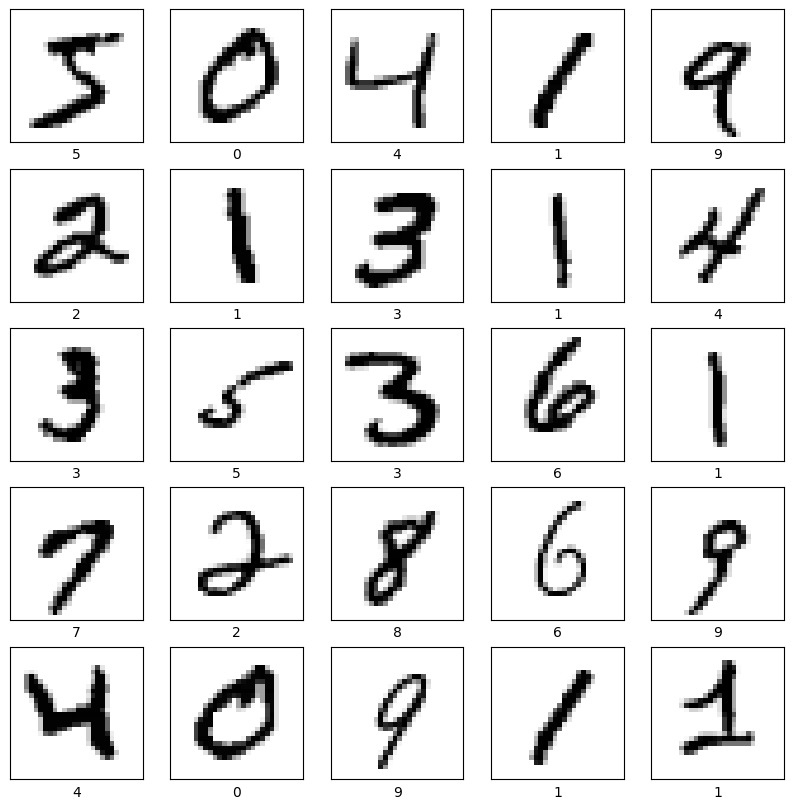

In [33]:
class_names = [str(x) for x in range(10)]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# 🌳 Before we dive in the deep learning territory, let's try to create some baseline model using a machine learning model so we can compare the approaches
* Are ML models capable of processing image data?
* 🔎 How to deal with a matrix input?

In [34]:
alg = DecisionTreeClassifier(random_state=13)
alg.fit(x_train.reshape(-1, 28*28), y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,13
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
y_pred = alg.predict(x_test.reshape(-1, 28*28))

In [36]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [37]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.877

# We can see that we were able to create a classifier very easily
* However it is no secret, that DL models accuracy on MNIST can be >= 98% even with simple architecture
* Given the fact, our result is not very impresive 🙂

# 🚀 Let's design our first ANN in Keras
* Model is created using layers, many layers exists in the [layer submodule](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
* Each layer uses a activation functions collected in the [module nn](https://www.tensorflow.org/api_docs/python/tf/nn)
* There are 2 ways of using the Keras API, **Sequential** and **Functional**
    * We will use the Sequential one
 
## 💡 Notice the last (output) layer
* Why do we have 10 neurons?
* Why do we use `softmax` activation?
    * Do you know any other common activation functions used in output layer?

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
    keras.layers.Dense(32, activation=tf.nn.relu), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
])

model.summary() # prints the summary of the model

c:\VSB\FML_vyuka\EFREI\EFREI-Introduction-to-Machine-Learning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

# 🔎 What is the meaning of the `Total params` number?

# 📌Each model need to be compiled to be able to fit to the data and predict the labels
* There are 3 important parameters we need to set

### 1 - Optimizer
* There are many optimizers available, you can experiment with different algorithms, most of them are based on gradient descent algorithm

### 2 - Loss function
* Training of the ANN is about weights optimization
* We need to some formula that says us if the optimization process is making the ANN better or not

* **The choice of a loss function depends on tha task and network architecture. Below are the most common loss functions mentioned.**
    * Mean Squared Error
       * A classical measure to be used in regression
    * Binary Cross-Entropy
       * Predict the class from the set {0,1}
       * Requires a sigmoid activation function
    * Categorical Cross-Entropy
       * Default for mutli-class classification problems
       * Requires the softmax function on output layer to compute probability of each label
       * Labels have to be one-hot-encoded
    * Sparse Categorical Cross-Entropy
       * The same as above, but the labels are not encoded

### 3 - Metric
* Used metrics for the model prediction accuracy evaluation are the same as in the ML area, i.e. accuracy, f1-score, recall, etc.
* The choice depends on the task and the labels distribution.

# ⚡ We can compile the model now
* We will use the accuracy metric
* Why do we use `SparseCategoricalCrossentropy`?
    * What is `from_logits` parameter?

* `SparseCategoricalCrossentropy` -> We expect labels to be provided as integers

* The output of the Dense layer will either return:
    * **probabilities**: The output is passed through a SoftMax function which normalizes the output into a set of probabilities over N neurons, that all add up to 1
    * **logits**: Raw output of N activations - no normalization by SoftMax applied

* Your loss function has to be informed as to whether it should expect a normalized distribution (output passed through a SoftMax function) or logits
    * 💡 If your output layer has a 'softmax' activation, `from_logits` should be `False`
    * 💡 If your output layer doesn't have a 'softmax' activation, `from_logits` should be `True`

In [39]:
model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

# Model visualization
* The model may be printed into image

In [40]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


# ⚡ Now we can fit the model to the input data
* The `fit()` method fit the model to the data
    * The parameters are *data* and *labels* from the train set and number of *epoch* to be trained
* The `validation_split` parameter is also very common
    * What does the parameter do?
    * 🔎 What is the validation set?
    * How is it different from the test set?

# Define the callbacks
* 💡 Always use ModelCheckpoint callback so you overcome the possible overfitting in the last few epochs!
- **The best weights are determined using the validation loss value**

In [41]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

# Fit the model

In [42]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=15, callbacks=[model_checkpoint_callback], batch_size=32)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8900 - loss: 0.3969 - val_accuracy: 0.9354 - val_loss: 0.2278
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9399 - loss: 0.2088 - val_accuracy: 0.9491 - val_loss: 0.1754
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9526 - loss: 0.1632 - val_accuracy: 0.9542 - val_loss: 0.1550
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.9602 - loss: 0.1362 - val_accuracy: 0.9567 - val_loss: 0.1464
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9643 - loss: 0.1182 - val_accuracy: 0.9607 - val_loss: 0.1352
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9681 - loss: 0.1046 - val_accuracy: 0.9622 - val_loss: 0.1330
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9714 - loss: 0.0940 - val_accuracy: 0.9643 - val_loss: 0.1240
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9740 - loss: 0.0851 

# Let's take a look at the accuracy and loss function values of train and validation set
* What can you see in the plot?
* Is OK that loss is getting lower and accuracy higher?
    * 🔎 Can the loss function value go higher? 
* What if the training set loss is getting lower, but validation set loss higher? 
    * 🔎 How do we call this situation?

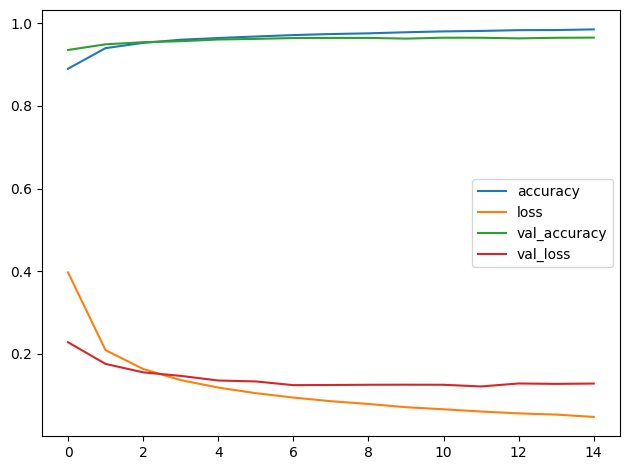

In [43]:
plt.figure()
for key in history.history.keys():
    plt.plot(history.epoch, history.history[key], label=key)
plt.legend()
plt.tight_layout()

# 💡 Beware that the best weights needs to be loaded after the training is finished!
* **Otherwise you use the weights from the last epoch!**

# We can use `evaluate()` function for obtaining the accuracy using the test set

# 📒 Can we obtain the labels and use it for our own evaluation without Keras? Sure!

## We will obtain the raw softmax outputs first
* What is the range of the vector values?
* Do they sum-up to some number?

## The numbers are hard to read, let's rather create barplot 🙂

## We need to extract the index of the highest probability to get the label
* 🔎 What will be the output in our case?

## And finally we can use the `argmax` on the whole output matrix...

## ... and compute the `accuracy_score` ✌
* Did we beat the ML baseline? 🙂

# ✅ Task
* Take a look at the Keras documentation
    * https://keras.io/guides/sequential_model/
    * https://keras.io/api/models/model_training_apis/
    * https://keras.io/api/layers/activations/
* Try to modify the architecture of the neural network
  * Add or remove hidden `Dense` layers
  * Change `activation` function of the hidden layers
  * 💡 Is accuracy better or worse with your modification?
* Try to change the `batch_size` in the `fit` method
  * Test values `1`, `8`, `16`, `32`, `64`
  * 💡 How was the training time and accuracy changed with different `batch_size` values?